In [1]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "Kellogs"
noOfTweet = int('600')


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  20
negative number:  510
neutral number:  70


In [7]:
tweet_list


,0
0,RT @NoodlesTori: with the recent call to boyco...
1,RT @NoodlesTori: with the recent call to boyco...
2,RT @NoodlesTori: with the recent call to boyco...
3,RT @NoodlesTori: with the recent call to boyco...
4,RT @NoodlesTori: with the recent call to boyco...
...,...
595,RT @NoodlesTori: with the recent call to boyco...
596,RT @NoodlesTori: with the recent call to boyco...
597,RT @NoodlesTori: with the recent call to boyco...
598,RT @NoodlesTori: with the recent call to boyco...


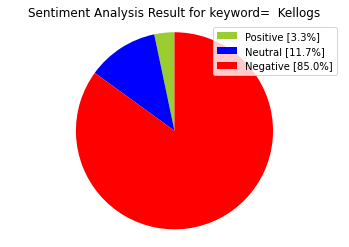

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)


In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @NoodlesTori: with the recent call to boyco...,RT @NoodlesTori: with the recent call to boyco...
20,kellogs palle https://t.co/HMVnYQ7xd8,kellogs palle https://t.co/HMVnYQ7xd8
24,"Isso aqui é virilidade, não aquela merda de su...","Isso aqui é virilidade, não aquela merda de su..."
29,@Fau1024 Que recuerdos! Con los kellogs!,@Fau1024 Que recuerdos! Con los kellogs!
30,@subetealanutria Tampoco entiendo retuits a ge...,@subetealanutria Tampoco entiendo retuits a ge...
...,...,...
540,Kellogs is home to some of the most trusted fo...,Kellogs is home to some of the most trusted fo...
541,@Sheila413375 @Totalaccess2010 @MorePerfectUS ...,@Sheila413375 @Totalaccess2010 @MorePerfectUS ...
544,@Isaeya_isaa Mange des kellogs,@Isaeya_isaa Mange des kellogs
556,@motelfawn kellogs protein bars (by far the be...,@motelfawn kellogs protein bars (by far the be...


In [11]:
tweet_list

,0,text
0,RT @NoodlesTori: with the recent call to boyco...,RT @NoodlesTori: with the recent call to boyco...
20,kellogs palle https://t.co/HMVnYQ7xd8,kellogs palle https://t.co/HMVnYQ7xd8
24,"Isso aqui é virilidade, não aquela merda de su...","Isso aqui é virilidade, não aquela merda de su..."
29,@Fau1024 Que recuerdos! Con los kellogs!,@Fau1024 Que recuerdos! Con los kellogs!
30,@subetealanutria Tampoco entiendo retuits a ge...,@subetealanutria Tampoco entiendo retuits a ge...
...,...,...
540,Kellogs is home to some of the most trusted fo...,Kellogs is home to some of the most trusted fo...
541,@Sheila413375 @Totalaccess2010 @MorePerfectUS ...,@Sheila413375 @Totalaccess2010 @MorePerfectUS ...
544,@Isaeya_isaa Mange des kellogs,@Isaeya_isaa Mange des kellogs
556,@motelfawn kellogs protein bars (by far the be...,@motelfawn kellogs protein bars (by far the be...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @NoodlesTori: with the recent call to boyco...,with the recent call to boycott kellogs and t...
20,kellogs palle https://t.co/HMVnYQ7xd8,kellogs palle
24,"Isso aqui é virilidade, não aquela merda de su...",isso aqui virilidade n o aquela merda de su...
29,@Fau1024 Que recuerdos! Con los kellogs!,que recuerdos con los kellogs
30,@subetealanutria Tampoco entiendo retuits a ge...,tampoco entiendo retuits a gente q afirma q ...
37,RT @MemoaufTW: Fragt ihr euch manchmal auch wa...,fragt ihr euch manchmal auch was ber hmte men...
57,Fragt ihr euch manchmal auch was berühmte Mens...,fragt ihr euch manchmal auch was ber hmte mens...
67,Ça sent les kellogs,a sent les kellogs
68,Make them famous and boycot kellogs https://t....,make them famous and boycot kellogs
70,@badboyblondey nein man nur mit kellogs oder k...,nein man nur mit kellogs oder kakao aber nic...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @NoodlesTori: with the recent call to boyco...,with the recent call to boycott kellogs and t...,0.1,0.5625,negative,0.181,0.748,0.071,-0.4215
20,kellogs palle https://t.co/HMVnYQ7xd8,kellogs palle,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
24,"Isso aqui é virilidade, não aquela merda de su...",isso aqui virilidade n o aquela merda de su...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
29,@Fau1024 Que recuerdos! Con los kellogs!,que recuerdos con los kellogs,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
30,@subetealanutria Tampoco entiendo retuits a ge...,tampoco entiendo retuits a gente q afirma q ...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
37,RT @MemoaufTW: Fragt ihr euch manchmal auch wa...,fragt ihr euch manchmal auch was ber hmte men...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
57,Fragt ihr euch manchmal auch was berühmte Mens...,fragt ihr euch manchmal auch was ber hmte mens...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
67,Ça sent les kellogs,a sent les kellogs,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
68,Make them famous and boycot kellogs https://t....,make them famous and boycot kellogs,0.5,1.0000,neutral,0.000,1.000,0.000,0.0000
70,@badboyblondey nein man nur mit kellogs oder k...,nein man nur mit kellogs oder kakao aber nic...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,52,61.90
positive,17,20.24
negative,15,17.86


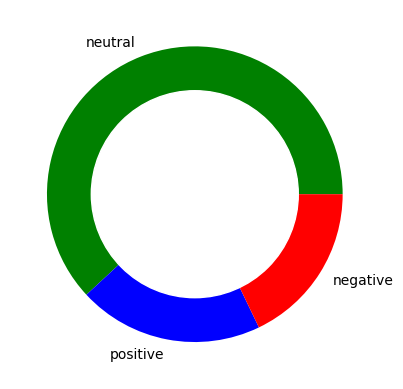

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [19]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [20]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,88.47
neutral,73.04
positive,99.35


In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,16.40
neutral,12.73
positive,18.35


In [22]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [23]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [24]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [26]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [27]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @NoodlesTori: with the recent call to boyco...,with the recent call to boycott kellogs and t...,0.1,0.5625,negative,0.181,0.748,0.071,-0.4215,124,24,with the recent call to boycott kellogs and t...,"[, with, the, recent, call, to, boycott, kello...","[, recent, call, boycott, kellogs, prior, boyc...","[, recent, call, boycott, kellog, prior, boyco..."
20,kellogs palle https://t.co/HMVnYQ7xd8,kellogs palle,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000,15,2,kellogs palle,"[kellogs, palle, ]","[kellogs, palle, ]","[kellog, pall, ]"
24,"Isso aqui é virilidade, não aquela merda de su...",isso aqui virilidade n o aquela merda de su...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000,68,10,isso aqui virilidade n o aquela merda de su...,"[isso, aqui, virilidade, n, o, aquela, merda, ...","[isso, aqui, virilidade, n, aquela, merda, de,...","[isso, aqui, virilidad, n, aquela, merda, de, ..."
29,@Fau1024 Que recuerdos! Con los kellogs!,que recuerdos con los kellogs,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000,33,5,que recuerdos con los kellogs,"[, que, recuerdos, con, los, kellogs, ]","[, que, recuerdos, con, los, kellogs, ]","[, que, recuerdo, con, lo, kellog, ]"
30,@subetealanutria Tampoco entiendo retuits a ge...,tampoco entiendo retuits a gente q afirma q ...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000,103,18,tampoco entiendo retuits a gente q afirma q ...,"[, tampoco, entiendo, retuits, a, gente, q, af...","[, tampoco, entiendo, retuits, gente, q, afirm...","[, tampoco, entiendo, retuit, gent, q, afirma,..."


In [28]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

84 Number of reviews has 534 words


In [29]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abdomen,aber,abknipsen,abogado,acabo,accion,achet,ad,add,...,watch,wie,worker,world,would,wouldnt,your,z,zum,zumba
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
kellog,67
de,33
en,13
que,10
worker,9
n,8
strike,8
su,7
cereal,7
le,7


In [31]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('les kellogs', 4),
 ('des kellogs', 4),
 ('kellogs workers', 4),
 ('workers strike', 4),
 ('en su', 3),
 ('dans les', 3),
 ('kellog ampl', 3),
 ('ampl su', 3),
 ('su planta', 3),
 ('planta cereales', 3),
 ('cereales en', 3),
 ('en quer', 3),
 ('quer taro', 3),
 ('boycott kellogs', 2),
 ('fragt ihr', 2),
 ('ihr euch', 2),
 ('euch manchmal', 2),
 ('manchmal auch', 2),
 ('auch ber', 2),
 ('ber hmte', 2)]

In [33]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('kellogs workers strike', 4),
 ('kellog ampl su', 3),
 ('ampl su planta', 3),
 ('su planta cereales', 3),
 ('planta cereales en', 3),
 ('cereales en quer', 3),
 ('en quer taro', 3),
 ('fragt ihr euch', 2),
 ('ihr euch manchmal', 2),
 ('euch manchmal auch', 2),
 ('manchmal auch ber', 2),
 ('auch ber hmte', 2),
 ('ber hmte menschen', 2),
 ('hmte menschen gerade', 2),
 ('menschen gerade machen', 2),
 ('gerade machen zum', 2),
 ('machen zum beispiel', 2),
 ('zum beispiel travis', 2),
 ('beispiel travis scott', 2),
 ('travis scott putzt', 2)]

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [47]:
K = yf.download("K", start="2021-10-11", end="2021-10-12", interval = "1h")
K

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,62.750000,63.040001,62.660000,62.935001,62.935001,252449
2021-10-11 10:30:00-04:00,62.930000,62.942402,62.549999,62.549999,62.549999,175470
2021-10-11 11:30:00-04:00,62.549999,62.750000,62.529999,62.615002,62.615002,138954
2021-10-11 12:30:00-04:00,62.619999,62.820000,62.619999,62.790001,62.790001,140580
2021-10-11 13:30:00-04:00,62.779999,62.840000,62.689999,62.779999,62.779999,158049
2021-10-11 14:30:00-04:00,62.779999,62.799999,62.570000,62.665001,62.665001,181197
2021-10-11 15:30:00-04:00,62.660000,62.900002,62.634998,62.750000,62.750000,292359


<AxesSubplot:>

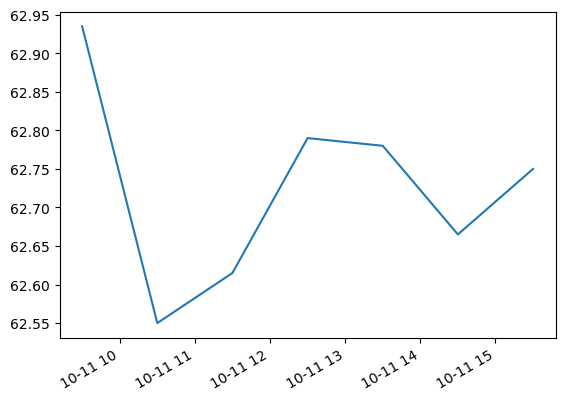

In [48]:
K['Adj Close'].plot()

In [49]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                84 non-null     object 
 1   text             84 non-null     object 
 2   polarity         84 non-null     float64
 3   subjectivity     84 non-null     float64
 4   sentiment        84 non-null     object 
 5   neg              84 non-null     float64
 6   neu              84 non-null     float64
 7   pos              84 non-null     float64
 8   compound         84 non-null     float64
 9   text_len         84 non-null     int64  
 10  text_word_count  84 non-null     int64  
 11  punct            84 non-null     object 
 12  tokenized        84 non-null     object 
 13  nonstop          84 non-null     object 
 14  stemmed          84 non-null     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 12.6+ KB
